In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [2]:
# read in CSV data
df = pd.read_csv('C:/Users/sweir/OneDrive/Desktop/Analysis Projects/Crude_Oil_Price_Projection/ML Resources/Cleaned_Crude_Oil_Dataset.csv')
df.head()

,Date,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1/1/1986,23.0,283248,498728,12583,15459,14639,820,81.4,22.9
1,2/1/1986,15.5,256855,453209,12068,15485,14538,947,77.9,15.5
2,3/1/1986,12.6,279413,504565,11759,15485,14517,968,75.9,12.6
3,4/1/1986,12.8,265917,478339,12603,15473,14550,923,81.5,12.8
4,5/1/1986,15.3,273964,495789,13314,15484,14805,679,86.0,15.4


In [3]:
# to convert the date column to type DATETIME
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

,Date,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
425,2021-06-01,71.4,338645,616115,16743,18128,17910,218,92.4,71.4
426,2021-07-01,72.4,351228,616714,16482,18129,17943,187,90.9,72.5
427,2021-08-01,67.7,347393,635828,16377,18130,17914,216,90.3,67.7
428,2021-09-01,71.5,324654,606706,15797,18130,15800,2331,87.1,71.6
429,2021-10-01,81.2,355670,616639,15581,18132,17133,999,85.9,81.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 10 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             430 non-null    datetime64[ns]
 1   Cushing, OK Crude Oil Future Contract ($/Bar.)                   430 non-null    float64       
 2   U.S. Field Production of Crude Oil (1k Bar.)                     430 non-null    int64         
 3   Product Supplied of Crude Oil and Petroleum Products (1k Bar.)   430 non-null    int64         
 4   Gross Inputs to Refineries (1k Bar./Day)                         430 non-null    int64         
 5   Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)  430 non-null    int64         
 6   Operating Crude Oil Distillation Capacity (1k Bar./Day)          430 non-null    i

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

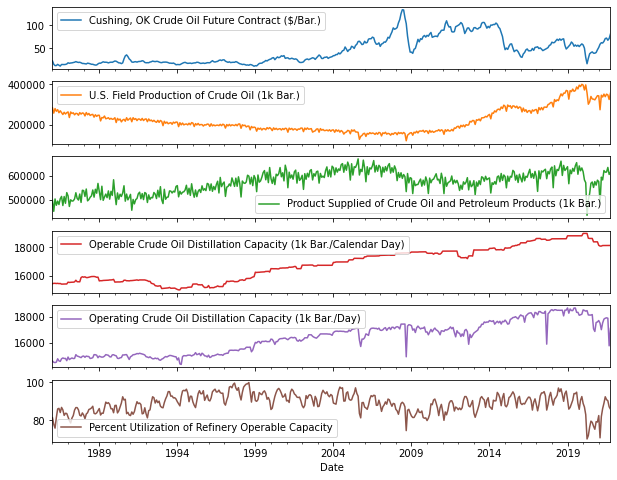

In [5]:
df.set_index('Date')[['Cushing, OK Crude Oil Future Contract ($/Bar.)', 'U.S. Field Production of Crude Oil (1k Bar.)', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)', 'Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)', 'Operating Crude Oil Distillation Capacity (1k Bar./Day)', 'Percent Utilization of Refinery Operable Capacity']].plot(subplots=True)

In [6]:
# creating input DataFrame (Cushing, OK Crude Oil Future Contract ($/Bar.) is our Dependent Variable)
df_input=df[['Cushing, OK Crude Oil Future Contract ($/Bar.)', 'U.S. Field Production of Crude Oil (1k Bar.)', 'Product Supplied of Crude Oil and Petroleum Products (1k Bar.)', 'Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)', 'Operating Crude Oil Distillation Capacity (1k Bar./Day)', 'Percent Utilization of Refinery Operable Capacity', ]]
df_input

,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity
0,23.0,283248,498728,15459,14639,81.4
1,15.5,256855,453209,15485,14538,77.9
2,12.6,279413,504565,15485,14517,75.9
3,12.8,265917,478339,15473,14550,81.5
4,15.3,273964,495789,15484,14805,86.0
...,...,...,...,...,...,...
425,71.4,338645,616115,18128,17910,92.4
426,72.4,351228,616714,18129,17943,90.9
427,67.7,347393,635828,18130,17914,90.3
428,71.5,324654,606706,18130,15800,87.1


In [7]:
df_input.describe()

,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,44.572326,220299.755814,574218.216279,16841.562791,16419.065116,89.159767
std,28.698790,59441.362987,45528.327895,1161.536555,1210.491590,4.918490
min,11.300000,119208.000000,436455.000000,15028.000000,14375.000000,70.200000
25%,19.900000,173878.250000,537078.500000,15686.250000,15117.000000,86.000000
50%,33.050000,202056.500000,579533.000000,16764.000000,16564.000000,89.500000
75%,63.500000,255772.250000,610163.500000,17736.000000,17227.500000,92.700000
max,134.000000,400219.000000,671648.000000,18976.000000,18698.000000,99.900000


# This model uses a StandardScaler

In [8]:
scaler = StandardScaler()
df_input_scaled = scaler.fit_transform(df_input)

In [9]:
df_input_scaled

array([[-0.75255623,  1.06023087, -1.6600247 , -1.19167427, -1.47224367,
        -1.57951029],
       [-1.0141957 ,  0.61569625, -2.66098441, -1.16926406, -1.55577803,
        -2.29193964],
       [-1.11536296,  0.99563835, -1.53166947, -1.16926406, -1.57314656,
        -2.69904212],
       ...,
       [ 0.80681499,  2.14061857,  1.35479494,  1.11054448,  1.23642017,
         0.23209575],
       [ 0.93937898,  1.75762791,  0.71440415,  1.11054448, -0.512012  ,
        -0.41926822],
       [ 1.27776603,  2.28002724,  0.93283014,  1.11226834,  0.59047621,
        -0.66352971]])

In [10]:
features=df_input_scaled
target=df_input_scaled[:,0]

In [11]:
TimeseriesGenerator(features, target, length=12, sampling_rate=1, batch_size=3)[0]

(array([[[-0.75255623,  1.06023087, -1.6600247 , -1.19167427,
          -1.47224367, -1.57951029],
         [-1.0141957 ,  0.61569625, -2.66098441, -1.16926406,
          -1.55577803, -2.29193964],
         [-1.11536296,  0.99563835, -1.53166947, -1.16926406,
          -1.57314656, -2.69904212],
         [-1.10838591,  0.7683266 , -2.10837742, -1.17960723,
          -1.54585316, -1.55915517],
         [-1.02117275,  0.9038614 , -1.72465311, -1.17012599,
          -1.33494956, -0.64317458],
         [-1.08745475,  0.6467714 , -2.03926307, -1.18650269,
          -1.46397294, -0.58210921],
         [-1.15024822,  0.81095597, -1.51080103, -1.17788337,
          -1.49871   , -1.02992194],
         [-1.02814981,  0.66159315, -1.29853222, -1.21667028,
          -1.33329542, -0.48033359],
         [-1.03512686,  0.49759385, -2.13190665, -1.21236063,
          -1.28118982, -0.7449502 ],
         [-1.03512686,  0.68524058, -1.30937325, -1.21236063,
          -1.31675396, -1.3352488 ],
         [

In [12]:
#defining train_test_splits
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [13]:
x_train.shape

(344, 6)

In [14]:
x_test.shape

(86, 6)

In [15]:
#defining training and testing generators
window_length=36
batch_size=12
num_features=6
training_generator = TimeseriesGenerator(x_train, y_train, length=window_length, sampling_rate=1, batch_size=batch_size)
testing_generator = TimeseriesGenerator(x_test, y_test, length=window_length, sampling_rate=1, batch_size=batch_size)

In [16]:
training_generator[0]

(array([[[-0.75255623,  1.06023087, -1.6600247 , -1.19167427,
          -1.47224367, -1.57951029],
         [-1.0141957 ,  0.61569625, -2.66098441, -1.16926406,
          -1.55577803, -2.29193964],
         [-1.11536296,  0.99563835, -1.53166947, -1.16926406,
          -1.57314656, -2.69904212],
         ...,
         [-1.07350065,  0.47840979, -0.6431223 , -0.77191368,
          -1.07690281, -1.17240781],
         [-1.06652359,  0.34359924, -1.00336136, -0.80380515,
          -1.10667743, -1.07063219],
         [-0.98628749,  0.4360499 , -0.10766746, -0.79518583,
          -1.26712958, -0.8263707 ]],
 
        [[-1.0141957 ,  0.61569625, -2.66098441, -1.16926406,
          -1.55577803, -2.29193964],
         [-1.11536296,  0.99563835, -1.53166947, -1.16926406,
          -1.57314656, -2.69904212],
         [-1.10838591,  0.7683266 , -2.10837742, -1.17960723,
          -1.54585316, -1.55915517],
         ...,
         [-1.06652359,  0.34359924, -1.00336136, -0.80380515,
          -1.106

In [17]:
# creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (window_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.35))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.35))
model.add(tf.keras.layers.Dense(1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 36, 128)           69120     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 36, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 36, 128)           131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 36, 128)           0         
                                                                 
 dropout (Dropout)           (None, 36, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                   patience=4,
                                                   mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(training_generator, epochs=50,
                     validation_data=testing_generator,
                     shuffle=False,
                     callbacks=[early_stopping])

Epoch 1/50
26/26 [==============================] - 17s 214ms/step - loss: 0.2354 - mean_absolute_error: 0.3457 - val_loss: 3.5618 - val_mean_absolute_error: 1.8203
Epoch 2/50
26/26 [==============================] - 3s 104ms/step - loss: 0.6859 - mean_absolute_error: 0.6387 - val_loss: 0.4882 - val_mean_absolute_error: 0.5740
Epoch 3/50
26/26 [==============================] - 3s 112ms/step - loss: 0.5370 - mean_absolute_error: 0.5570 - val_loss: 2.3705 - val_mean_absolute_error: 1.4628
Epoch 4/50
26/26 [==============================] - 3s 110ms/step - loss: 0.5977 - mean_absolute_error: 0.5400 - val_loss: 0.6099 - val_mean_absolute_error: 0.6563
Epoch 5/50
26/26 [==============================] - 3s 107ms/step - loss: 0.5110 - mean_absolute_error: 0.5476 - val_loss: 0.8351 - val_mean_absolute_error: 0.8060
Epoch 6/50
26/26 [==============================] - 3s 111ms/step - loss: 0.5239 - mean_absolute_error: 0.6047 - val_loss: 1.2211 - val_mean_absolute_error: 1.0163


In [20]:
model.evaluate(testing_generator, verbose=0)

[1.2210807800292969, 1.016261339187622]

In [21]:
predictions=model.predict(testing_generator)

In [22]:
predictions.shape[0]

50

In [23]:
predictions

array([[1.3839446],
       [1.3819155],
       [1.3808364],
       [1.381617 ],
       [1.3853062],
       [1.3886151],
       [1.3916708],
       [1.3971798],
       [1.4029372],
       [1.4090911],
       [1.4144987],
       [1.4203779],
       [1.4247941],
       [1.4280324],
       [1.4307357],
       [1.4322441],
       [1.4324718],
       [1.4316611],
       [1.4309696],
       [1.4313909],
       [1.4320937],
       [1.4330801],
       [1.4333321],
       [1.4336208],
       [1.4329212],
       [1.4317869],
       [1.4302303],
       [1.4290285],
       [1.4281411],
       [1.4271606],
       [1.4253078],
       [1.4242086],
       [1.422732 ],
       [1.4219359],
       [1.421981 ],
       [1.4235674],
       [1.4256121],
       [1.4268041],
       [1.4278358],
       [1.4299732],
       [1.4332206],
       [1.4366888],
       [1.4397335],
       [1.444901 ],
       [1.449528 ],
       [1.454098 ],
       [1.4585453],
       [1.4623199],
       [1.4649605],
       [1.4661384]],

In [24]:
y_test

array([ 1.68941212,  1.38591034,  1.08938561,  0.51377878,  0.09515564,
        0.21376553,  0.11608679,  0.34981805,  0.51726731,  0.53122142,
        0.22074258, -0.05833952,  0.03236217,  0.06027038, -0.05833952,
       -0.25369698, -0.44556593, -0.48742824, -0.2292773 , -0.12113299,
        0.07771301,  0.14748353,  0.00794248,  0.00794248,  0.02189659,
        0.18585732,  0.04631627,  0.26609342,  0.28004753,  0.31144426,
        0.17888027,  0.22771963,  0.13701795,  0.02189659,  0.07422448,
        0.12306385,  0.18585732,  0.24865079,  0.41610005,  0.46493942,
        0.66029689,  0.61494604,  0.63936573,  0.75797562,  0.88356256,
        0.79286088,  0.91147077,  0.81030351,  0.89053962,  0.9149593 ,
        0.41958858,  0.143995  ,  0.24516226,  0.36377216,  0.475405  ,
        0.67425099,  0.5695952 ,  0.35330658,  0.45098531,  0.3567951 ,
        0.43354268,  0.32888689,  0.43703121,  0.53122142,  0.45098531,
        0.20678848, -0.49440529, -0.97233339, -0.56068729, -0.21

In [25]:
x_test

array([[ 1.68941212,  0.88039924,  0.04160019,  0.85627472,  1.04123096,
         0.51706749],
       [ 1.38591034,  1.1266761 ,  0.80264974,  0.87006562,  0.8658915 ,
        -0.29713747],
       [ 1.08938561,  1.00203865,  0.1669648 ,  0.83558837,  1.03626852,
         0.55777774],
       [ 0.51377878,  1.28309609,  0.66171627,  0.83558837,  1.00566682,
         1.00559047],
       [ 0.09515564,  1.18837163,  0.51106325,  0.97004966,  1.11566752,
        -0.27678235],
       [ 0.21376553,  0.77166149, -0.51344767,  0.95539683,  1.01311048,
        -0.41926822],
       [ 0.11608679,  1.29252812,  0.56287153,  0.95539683,  0.86175613,
        -0.13429648],
       [ 0.34981805,  1.16949075,  0.07935691,  0.96574001,  0.88491418,
         0.57813286],
       [ 0.51726731,  1.23598651,  0.54475182,  0.96574001,  1.15784824,
         0.67990848],
       [ 0.53122142,  1.01810678,  0.46556608,  1.04676156,  1.20251018,
         0.92416997],
       [ 0.22074258,  1.22133319,  1.08770523,  1.

In [26]:
x_test[:,1:][window_length:]

array([[ 1.09794211,  0.3224556 ,  1.42601137, -0.40697374, -0.76530533],
       [ 1.3327658 ,  0.98688139,  1.4268733 ,  1.51514375, -0.15465161],
       [ 1.38129019,  0.77162195,  1.43376875,  1.6019864 ,  0.70026361],
       [ 1.50001578,  1.22435066,  1.46652215,  1.73018271,  1.12772121],
       [ 1.50880777,  1.39145215,  1.51392837,  1.77649879,  0.37458162],
       [ 1.13567021, -0.5015951 ,  1.51392837,  1.71364125, -0.2360721 ],
       [ 1.75159815,  1.50520607,  1.51392837,  1.77153635,  0.39493674],
       [ 1.59170852,  0.59225008,  1.51392837,  1.77153635,  0.57813286],
       [ 1.73244777,  1.1779739 ,  1.51392837,  1.73514515,  0.82239435],
       [ 1.65965277,  1.07508301,  1.51392837,  1.74010758,  1.59588907],
       [ 1.97466549,  1.46441475,  1.51392837,  1.73514515,  1.20914171],
       [ 2.22789847,  1.93117304,  1.51651417,  1.73762636,  1.51446857],
       [ 2.06090113,  0.62242026,  1.51651417,  1.7425888 ,  0.88345972],
       [ 2.28790971,  1.54241304,  1.5

In [27]:
df_predictions2=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][window_length:])],axis=1)

In [28]:
df_predictions2

,0,0,1,2,3,4
0,1.383945,1.097942,0.322456,1.426011,-0.406974,-0.765305
1,1.381915,1.332766,0.986881,1.426873,1.515144,-0.154652
2,1.380836,1.381290,0.771622,1.433769,1.601986,0.700264
3,1.381617,1.500016,1.224351,1.466522,1.730183,1.127721
4,1.385306,1.508808,1.391452,1.513928,1.776499,0.374582
5,1.388615,1.135670,-0.501595,1.513928,1.713641,-0.236072
6,1.391671,1.751598,1.505206,1.513928,1.771536,0.394937
7,1.397180,1.591709,0.592250,1.513928,1.771536,0.578133
8,1.402937,1.732448,1.177974,1.513928,1.735145,0.822394
9,1.409091,1.659653,1.075083,1.513928,1.740108,1.595889


In [29]:
reverse_transformation=scaler.inverse_transform(df_predictions2)

In [30]:
reverse_transformation

array([[8.42436522e+01, 2.85487000e+05, 5.88882000e+05, 1.84960000e+04,
        1.59270000e+04, 8.54000000e+01],
       [8.41854849e+01, 2.99429000e+05, 6.19097000e+05, 1.84970000e+04,
        1.82510000e+04, 8.84000000e+01],
       [8.41545526e+01, 3.02310000e+05, 6.09308000e+05, 1.85050000e+04,
        1.83560000e+04, 9.26000000e+01],
       [8.41769283e+01, 3.09359000e+05, 6.29896000e+05, 1.85430000e+04,
        1.85110000e+04, 9.47000000e+01],
       [8.42826832e+01, 3.09881000e+05, 6.37495000e+05, 1.85980000e+04,
        1.85670000e+04, 9.10000000e+01],
       [8.43775339e+01, 2.87727000e+05, 5.51408000e+05, 1.85980000e+04,
        1.84910000e+04, 8.80000000e+01],
       [8.44651266e+01, 3.24296000e+05, 6.42668000e+05, 1.85980000e+04,
        1.85610000e+04, 9.11000000e+01],
       [8.46230448e+01, 3.14803000e+05, 6.01151000e+05, 1.85980000e+04,
        1.85610000e+04, 9.20000000e+01],
       [8.47880810e+01, 3.23159000e+05, 6.27787000e+05, 1.85980000e+04,
        1.85170000e+04, 

In [31]:
df_final=df_input[predictions.shape[0]*-1:]

In [32]:
df_final.count()

Cushing, OK Crude Oil Future Contract ($/Bar.)                     50
U.S. Field Production of Crude Oil (1k Bar.)                       50
Product Supplied of Crude Oil and Petroleum Products (1k Bar.)     50
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)    50
Operating Crude Oil Distillation Capacity (1k Bar./Day)            50
Percent Utilization of Refinery Operable Capacity                  50
dtype: int64

In [33]:
df_final['predicted_wti_futures_price']=reverse_transformation[:,0]

C:\Users\sweir\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_final

,"Cushing, OK Crude Oil Future Contract ($/Bar.)",U.S. Field Production of Crude Oil (1k Bar.),Product Supplied of Crude Oil and Petroleum Products (1k Bar.),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,predicted_wti_futures_price
380,49.9,285487,588882,18496,15927,85.4,84.243652
381,51.7,299429,619097,18497,18251,88.4,84.185485
382,56.5,302310,609308,18505,18356,92.6,84.154553
383,57.9,309359,629896,18543,18511,94.7,84.176928
384,63.5,309881,637495,18598,18567,91.0,84.282683
385,62.2,287727,551408,18598,18491,88.0,84.377534
386,62.9,324296,642668,18598,18561,91.1,84.465127
387,66.3,314803,601151,18598,18561,92.0,84.623045
388,69.9,323159,627787,18598,18517,93.2,84.788081
389,67.3,318837,623108,18598,18523,97.0,84.964486


<AxesSubplot:>

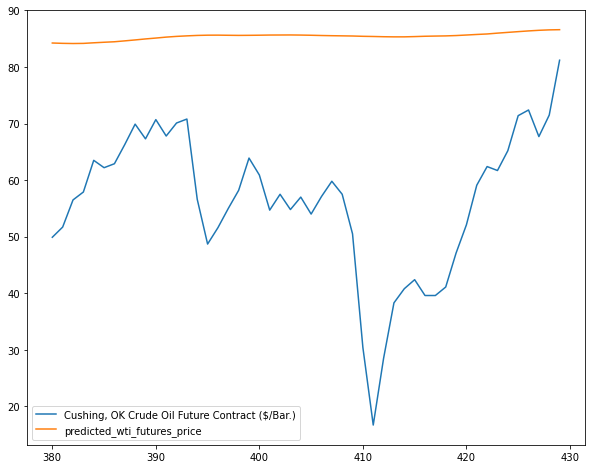

In [35]:
df_final[['Cushing, OK Crude Oil Future Contract ($/Bar.)', 'predicted_wti_futures_price']].plot()